In [17]:
import pandas as pd

# Load the dataset into a DataFrame
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df

# Calculate statistics for numeric attributes
def calculate_numeric_stats(column):
    min_val = column.min()
    max_val = column.max()
    mean_val = column.mean()
    median_val = column.median()
    std_dev = column.std()
    return min_val, max_val, mean_val, median_val, std_dev

# Calculate statistics for discrete attributes
def calculate_discrete_stats(column):
    unique_values = column.nunique()
    top_values = dict(column.value_counts().nlargest(3))
    return unique_values, top_values

# Calculate missingness percentage
def calculate_missingness(column):
    missing_percentage = (column.isnull().mean() * 100) if column.isna().any() else 0
    return missing_percentage

# Fill missing values with '-'
def fill_missing_with_dash(column):
    column.fillna('-', inplace=True)

# Summarize attribute information
def summarize_attributes(df):
    attribute_info = []

    for column_name in df.columns:
        column_data = df[column_name]
        stats = {}
        stats['Attribute'] = column_name
        stats['Type'] = 'numeric' if pd.api.types.is_numeric_dtype(column_data) else 'discrete'
        
        if stats['Type'] == 'numeric':
            min_val, max_val, mean_val, median_val, std_dev = calculate_numeric_stats(column_data)
            stats['Min'], stats['Max'], stats['Mean'], stats['Median'], stats['Std Dev'] = (
                min_val if not pd.isna(min_val) else '-',
                max_val if not pd.isna(max_val) else '-',
                mean_val if not pd.isna(mean_val) else '-',
                median_val if not pd.isna(median_val) else '-',
                std_dev if not pd.isna(std_dev) else '-'
            )
            stats['Unique Values'], stats['Top 3 Values'] = '-', '-'
        else:
            stats['Min'], stats['Max'], stats['Mean'], stats['Median'], stats['Std Dev'] = '-', '-', '-', '-', '-'
            unique_values, top_values = calculate_discrete_stats(column_data)
            stats['Unique Values'] = unique_values if not pd.isna(unique_values) else '-'
            stats['Top 3 Values'] = top_values if not pd.isna(top_values) else '-'
        
        stats['Missingness (%)'] = calculate_missingness(column_data)
        fill_missing_with_dash(column_data)

        attribute_info.append(stats)

    return pd.DataFrame(attribute_info)

# Main function
def main():
    file_path = 'Baltimore911.csv'
    df = load_dataset(file_path)
    
    total_rows = len(df)
    total_columns = len(df.columns)
    
    attribute_info_df = summarize_attributes(df)
    
    print("Total number of call instances (rows):", total_rows)
    print("Total number of call features (columns):", total_columns)
    print("\nDataFrame with Attribute Information:")
    print(attribute_info_df)

    # Save the DataFrame to a tab-separated .txt file
    attribute_info_df.to_csv('attribute_information.txt', sep='\t', index=False)

if __name__ == "__main__":
    main()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/3220940433.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Total number of call instances (rows): 218964
Total number of call features (columns): 16

DataFrame with Attribute Information:
          Attribute      Type        Min        Max       Mean     Median  \
0         CrimeDate  discrete          -          -          -          -   
1         CrimeTime  discrete          -          -          -          -   
2         CrimeCode  discrete          -          -          -          -   
3          Location  discrete          -          -          -          -   
4       Description  discrete          -          -          -          -   
5    Inside/Outside  discrete          -          -          -          -   
6            Weapon  discrete          -          -          -          -   
7              Post  discrete          -          -          -          -   
8          District  discrete          -          -          -          -   
9      Neighborhood  discrete          -          -          -          -   
10        Longitude   nu

/Users/maloyd1/miniforge3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
218959    2015
218960    2015
218961    2015
218962    2015
218963    2015
Name: Year, Length: 218964, dtype: int32


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/4263461483.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


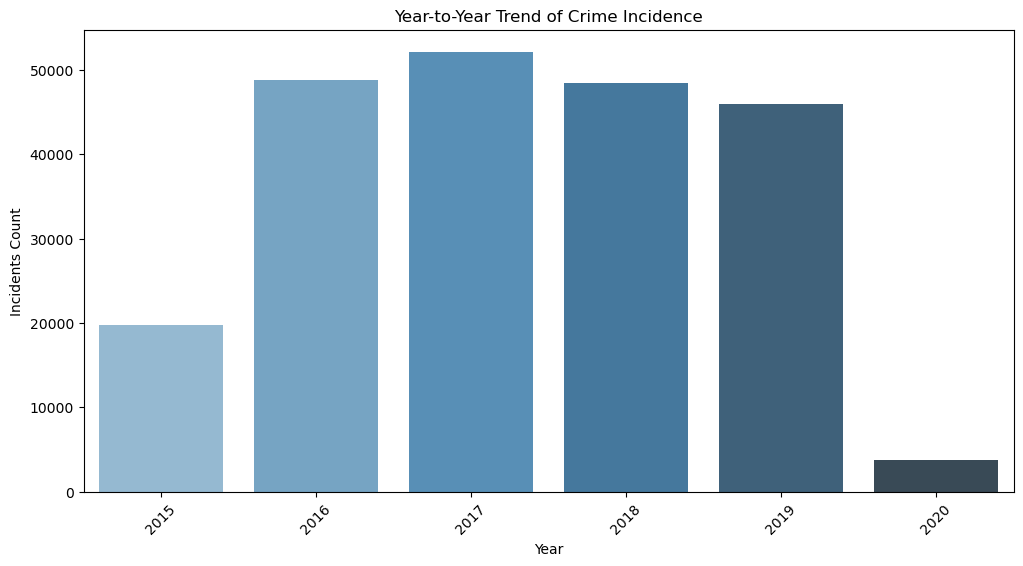

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Convert the "CrimeDate" column to a datetime object
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract the year from the "CrimeDate" column
df['Year'] = df['CrimeDate'].dt.year



# Group the data by year and count the number of incidents per year
yearly_incidents = df['Year'].value_counts().sort_index()

# Create a bar plot to show the year-to-year trend
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_incidents.index, y=yearly_incidents.values, palette="Blues_d")
plt.title('Year-to-Year Trend of Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Incidents Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/4112393736.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


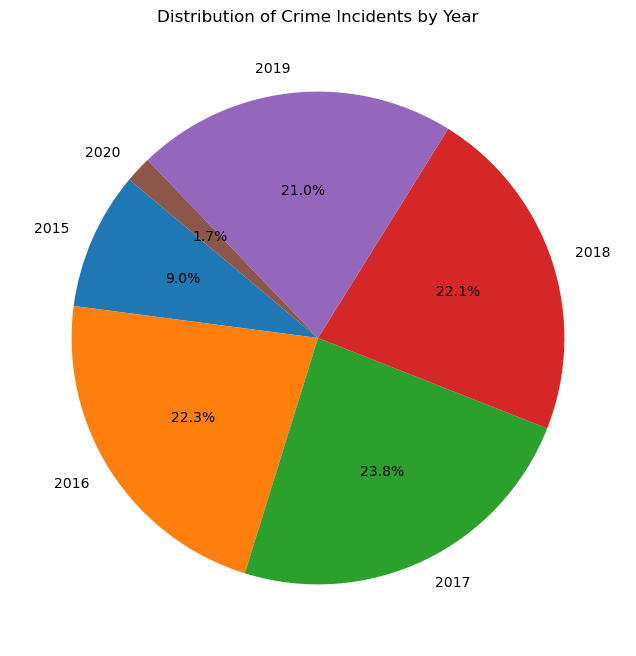

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Convert the "CrimeDate" column to a datetime object
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract the year from the "CrimeDate" column
df['Year'] = df['CrimeDate'].dt.year

# Group the data by year and count the number of incidents per year
yearly_incidents = df['Year'].value_counts().sort_index()

# Create a pie chart to show the distribution of incidents by year
plt.figure(figsize=(8, 8))
plt.pie(yearly_incidents.values, labels=yearly_incidents.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Incidents by Year')

# Show the pie chart
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/696097108.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


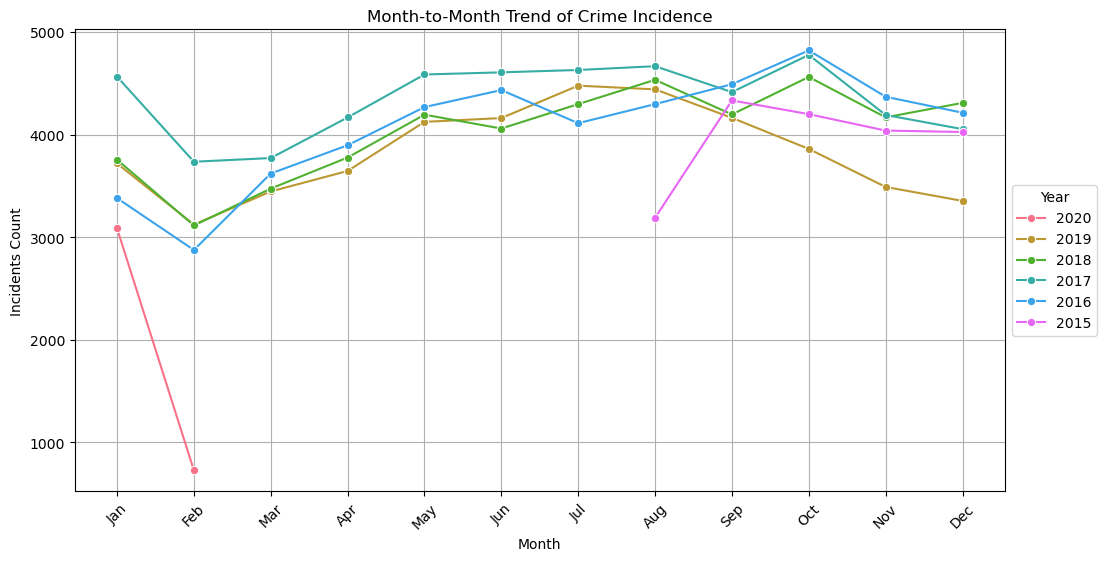

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Convert the "CrimeDate" column to a datetime object
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract the year and month from the "CrimeDate" column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month

# Create a single plot with multiple legends
plt.figure(figsize=(12, 6))
sns.set_palette("husl", len(df['Year'].unique()))  # Use a different color for each year

for year in df['Year'].unique():
    monthly_incidents = df[df['Year'] == year]['Month'].value_counts().sort_index()
    
    # Map month numbers to their abbreviated names
    month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    monthly_incidents.index = [month_names[i - 1] for i in monthly_incidents.index]
    
    sns.lineplot(data=monthly_incidents, marker='o', label=str(year))
    
plt.title('Month-to-Month Trend of Crime Incidence')
plt.xlabel('Month')
plt.ylabel('Incidents Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Year", loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/993156695.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


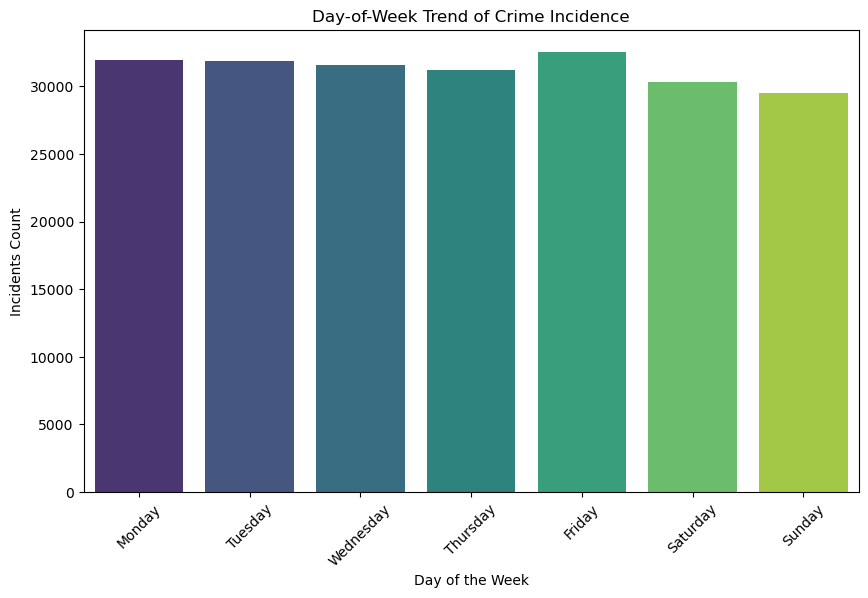

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Convert the "CrimeDate" column to a datetime object
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek

# Map day of the week numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayName'] = df['DayOfWeek'].map(lambda x: day_names[x])

# Group the data by day of the week and count the number of incidents per day
daily_incidents = df['DayOfWeek'].value_counts().sort_index()

# Create a bar plot to show the day-of-week trend
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_incidents.index, y=daily_incidents.values, palette="viridis")
plt.title('Day-of-Week Trend of Crime Incidence')
plt.xlabel('Day of the Week')
plt.ylabel('Incidents Count')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)  # Label x-axis with day names

# Show the plot
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/2078120136.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


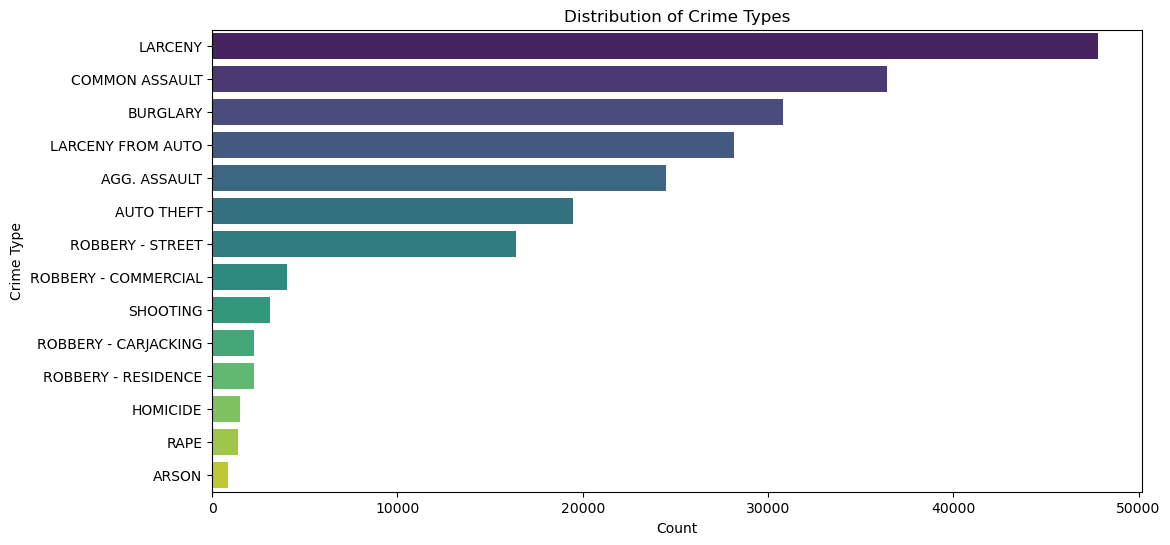

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Create a bar plot to show the distribution of crime types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Description', order=df['Description'].value_counts().index, palette="viridis")
plt.title('Distribution of Crime Types')
plt.xlabel('Count')
plt.ylabel('Crime Type')

# Show the plot
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/3830042021.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


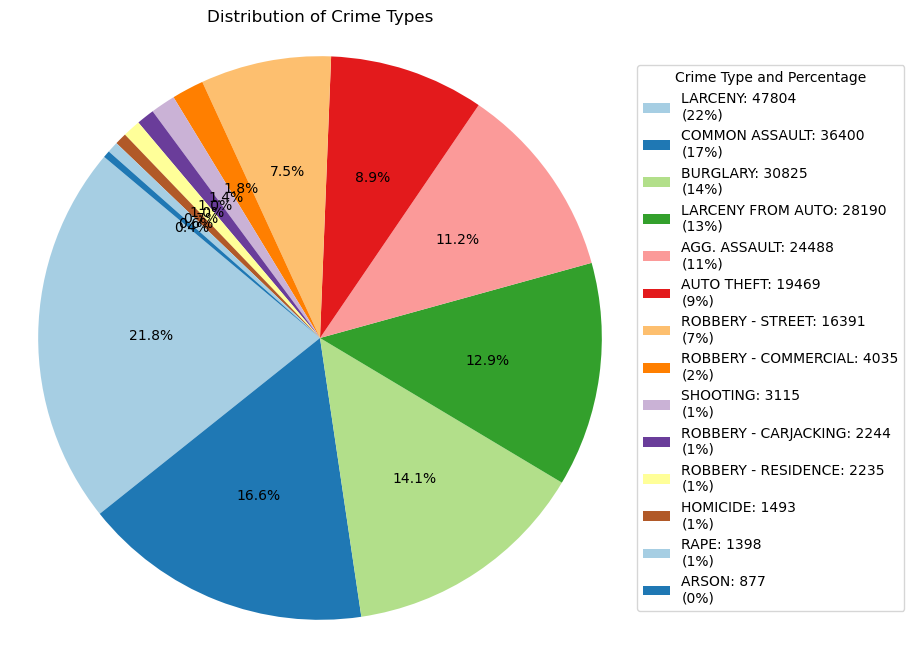

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Calculate the distribution of crime types
crime_type_distribution = df['Description'].value_counts()

# Create a pie chart to show the distribution of crime types
plt.figure(figsize=(8, 8))
plt.pie(crime_type_distribution, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, labeldistance=1.15)
plt.title('Distribution of Crime Types')

# Add percentage labels outside of the pie chart
percentage_labels = [f"{crime_type}: {count}\n({percent:.0f}%)"
                     for crime_type, count, percent in zip(crime_type_distribution.index, crime_type_distribution.values, (crime_type_distribution / crime_type_distribution.sum()) * 100)]
plt.legend(percentage_labels, title="Crime Type and Percentage", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/1411861232.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')
/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/1411861232.py:16: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  crime_type_distributions.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca(), color=colors)
/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/1411861232.py:16: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  crime_type_distributions.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca(), color=colors)


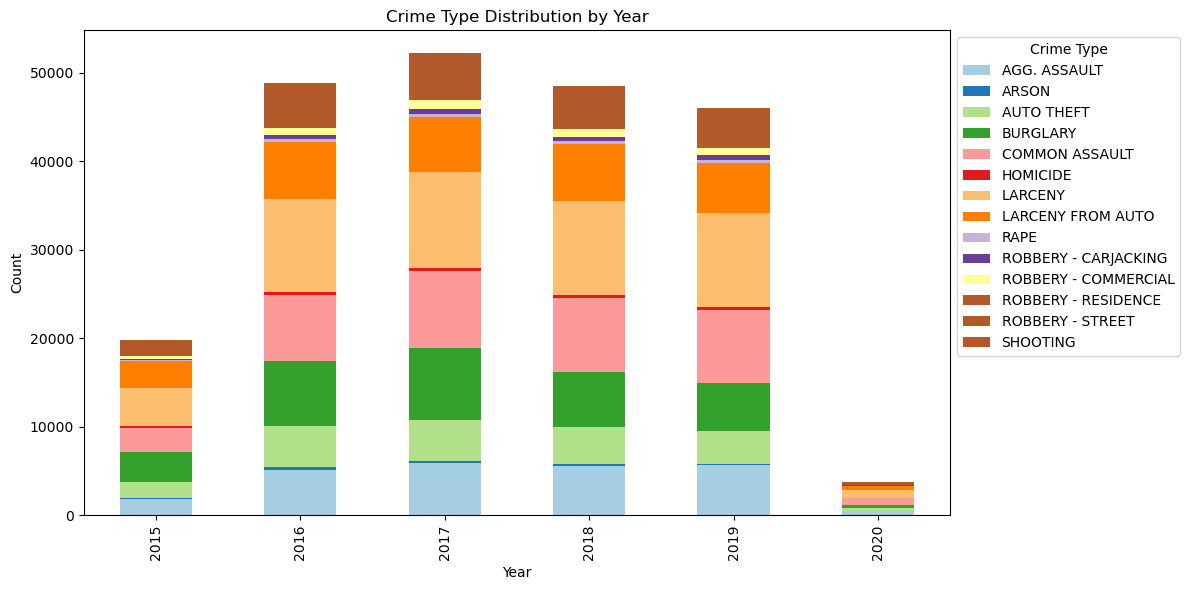

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Extract the year from the "CrimeDate" column
df['Year'] = pd.to_datetime(df['CrimeDate']).dt.year

# Calculate the distribution of crime types for each year
crime_type_distributions = df.groupby(['Year', 'Description']).size().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
colors = plt.cm.Paired(range(len(crime_type_distributions.columns)))
crime_type_distributions.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca(), color=colors)
plt.title('Crime Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/1039931267.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argum

[2020 2019 2018 2017 2016 2015]


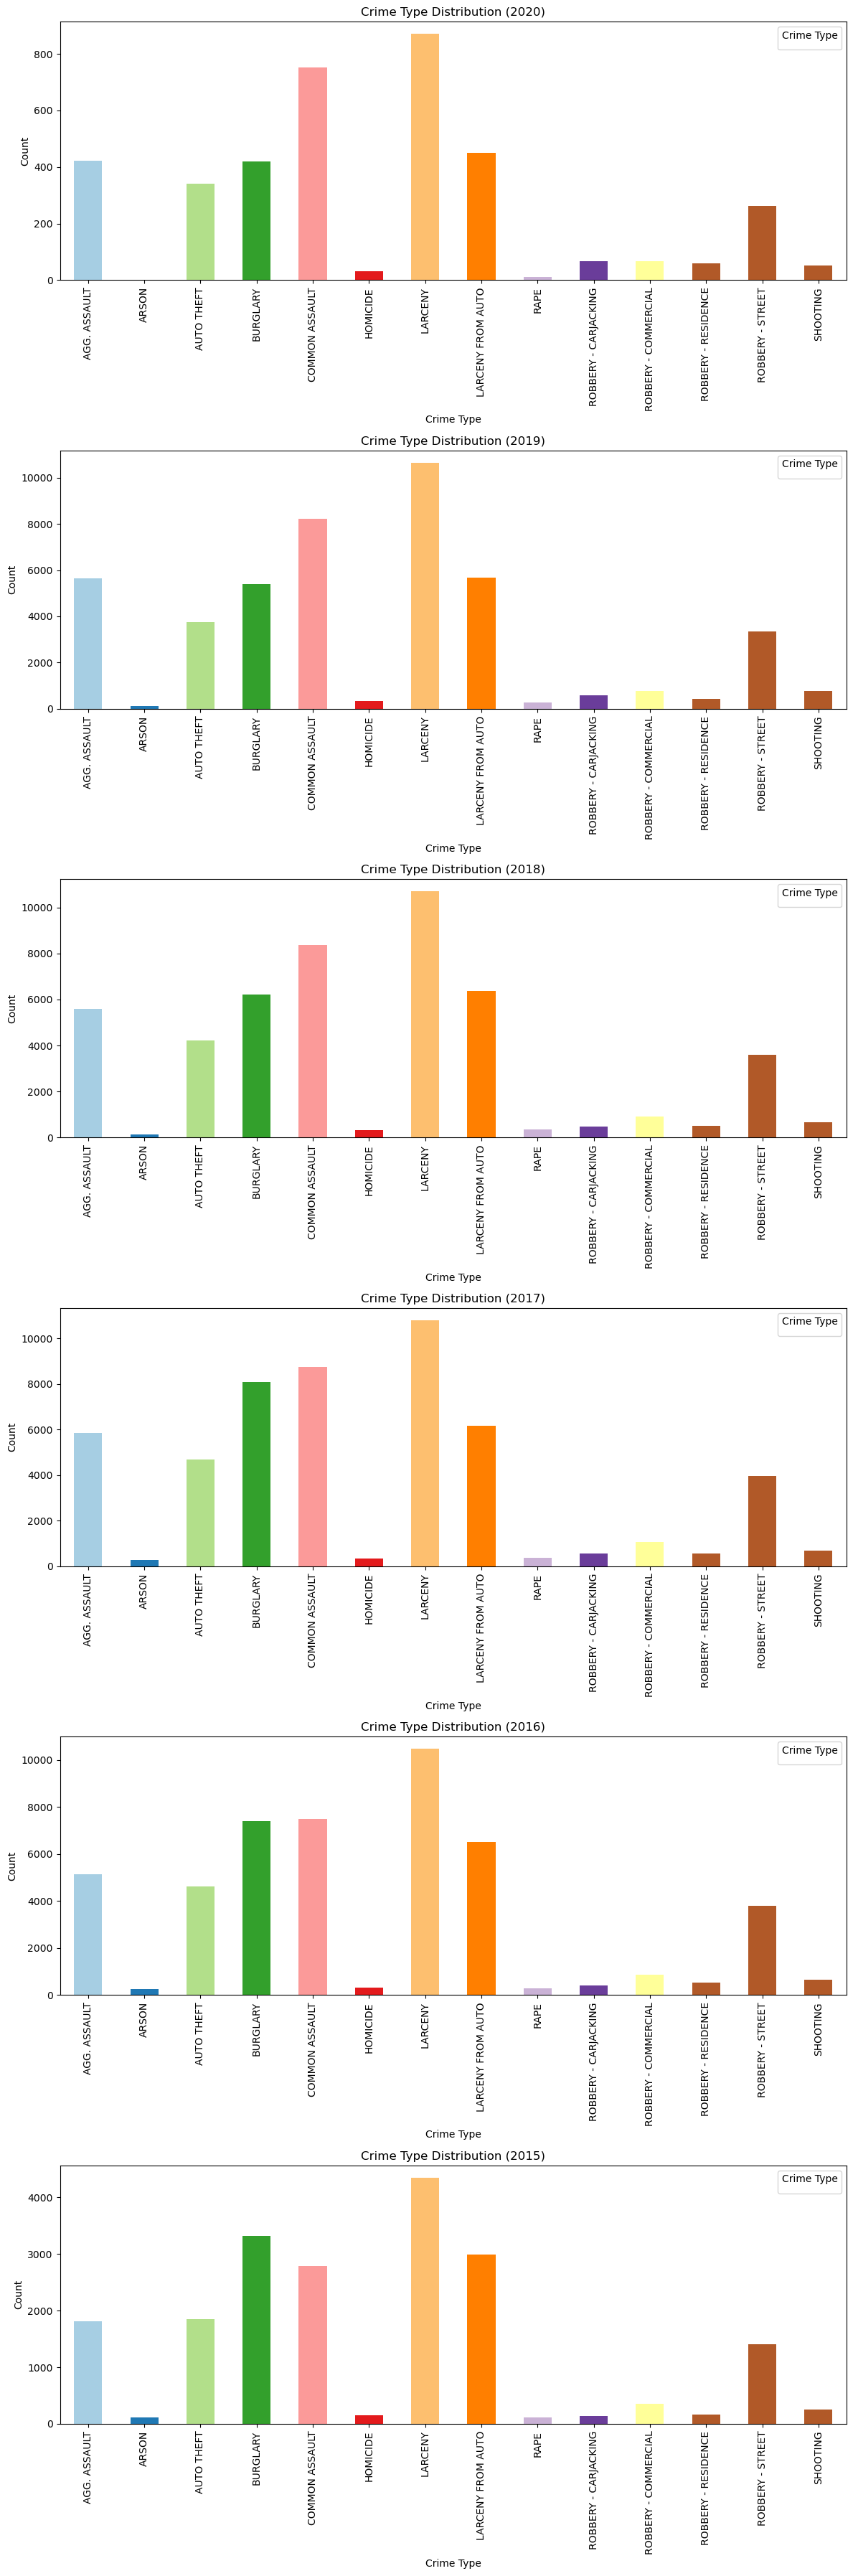

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Extract the year from the "CrimeDate" column
df['Year'] = pd.to_datetime(df['CrimeDate']).dt.year

# Get unique years in the dataset
unique_years = df['Year'].unique()

print(unique_years)

# Create subplots for each year
num_years = len(unique_years)
fig, axes = plt.subplots(num_years, 1, figsize=(12, 6 * num_years))

# Calculate and plot crime type distribution for each year
for i, year in enumerate(unique_years):
    crime_type_distributions = df[df['Year'] == year].groupby('Description').size()
    ax = axes[i]
    colors = plt.cm.Paired(range(len(crime_type_distributions)))
    crime_type_distributions.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Crime Type Distribution ({year})')
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('Count')
    ax.legend(title='Crime Type', bbox_to_anchor=(1, 1))

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/2036970493.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


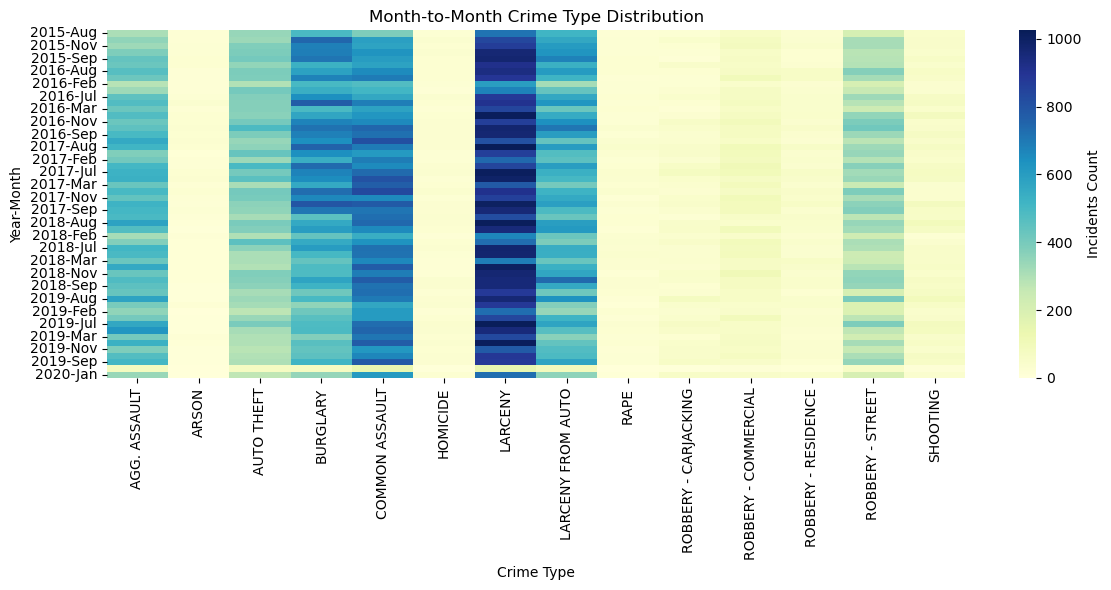

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Convert the "CrimeDate" column to a datetime object
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract the year and month from the "CrimeDate" column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.strftime('%b')  # Format month as three-letter abbreviation

# Pivot the data to create a heatmap
crime_type_distribution = df.groupby(['Year', 'Month', 'Description']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_type_distribution, cmap='YlGnBu', cbar_kws={'label': 'Incidents Count'})
plt.title('Month-to-Month Crime Type Distribution')
plt.xlabel('Crime Type')
plt.ylabel('Year-Month')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/3353552793.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


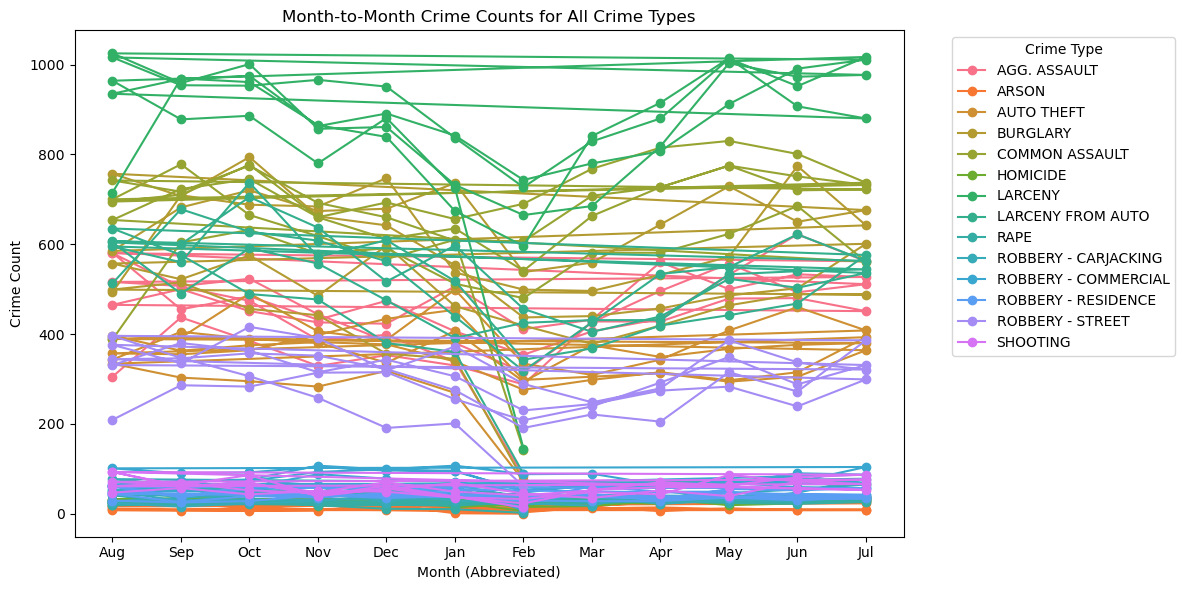

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Convert the "CrimeDate" column to a datetime object
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract the year and month from the "CrimeDate" column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month

# Group the data by year, month, and crime type and count the number of incidents
month_month_counts = df.groupby(['Year', 'Month', 'Description']).size().unstack(fill_value=0)

# Create a line plot to show the month-to-month crime counts for all crime types
plt.figure(figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Define a custom color palette with 16 distinct colors
custom_palette = sns.color_palette("husl", 16)

# Plot each crime type with a unique color
for idx, (crime_type, color) in enumerate(zip(month_month_counts.columns, custom_palette)):
    monthly_counts = month_month_counts[crime_type]
    monthly_counts.index = [month_names[i - 1] for i in monthly_counts.index.get_level_values('Month')]
    plt.plot(monthly_counts.index, monthly_counts.values, label=crime_type, marker='o', color=color)

plt.title('Month-to-Month Crime Counts for All Crime Types')
plt.xlabel('Month (Abbreviated)')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2636/3266324602.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


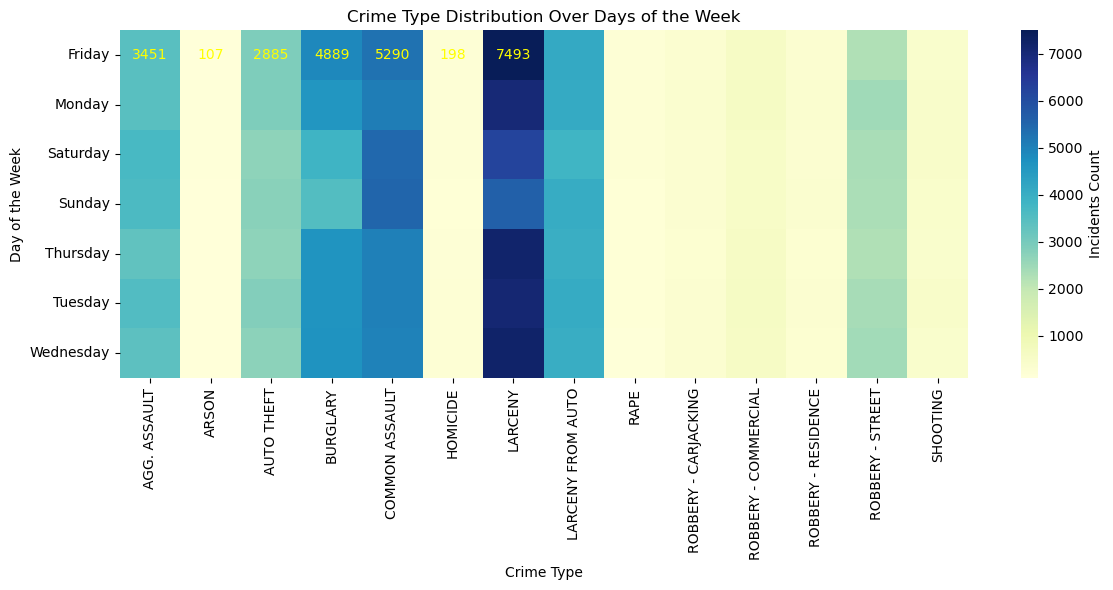

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual path or name of your dataset file)
df = pd.read_csv('Baltimore911.csv')

# Convert the "CrimeDate" column to a datetime object
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek

# Map the day of the week to its name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = df['DayOfWeek'].map(lambda x: day_names[x])

# Pivot the data to create a heatmap
crime_type_distribution = df.groupby(['DayOfWeek', 'Description']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_type_distribution, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Incidents Count'},
            annot_kws={'size': 10, 'color': 'yellow'})  # Change text color to black
plt.title('Crime Type Distribution Over Days of the Week')
plt.xlabel('Crime Type')
plt.ylabel('Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2636/2991552509.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


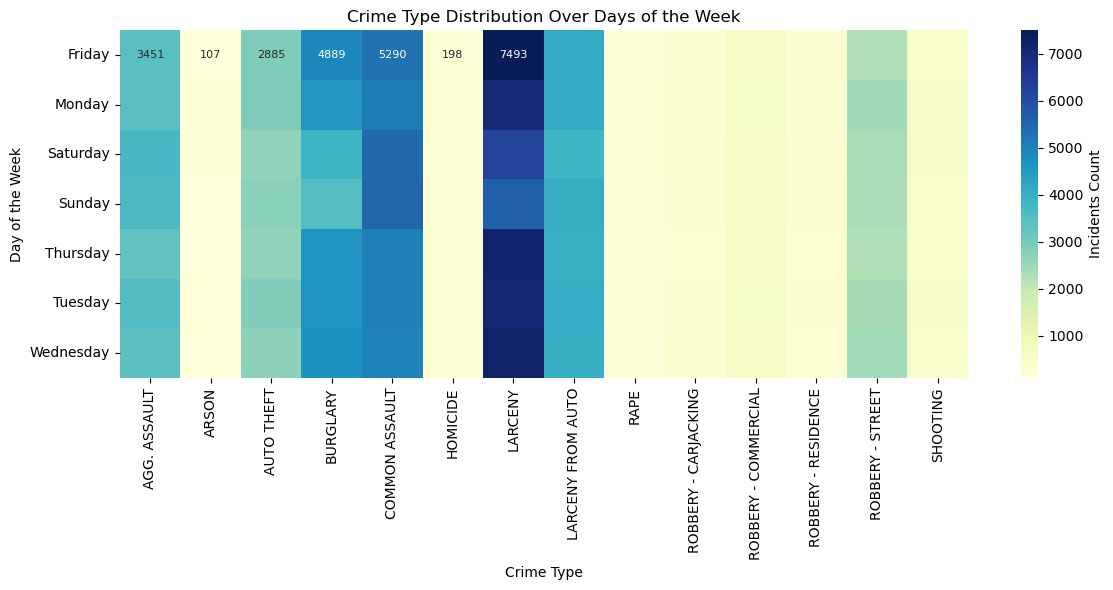

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual path or name of your dataset file)
df = pd.read_csv('Baltimore911.csv')

# Convert the "CrimeDate" column to a datetime object
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek

# Map the day of the week to its name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = df['DayOfWeek'].map(lambda x: day_names[x])

# Pivot the data to create a heatmap
crime_type_distribution = df.groupby(['DayOfWeek', 'Description']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_type_distribution, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Incidents Count'}, annot_kws={'size': 8})
plt.title('Crime Type Distribution Over Days of the Week')
plt.xlabel('Crime Type')
plt.ylabel('Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


In [67]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load your dataset
df = pd.read_csv('Baltimore911.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Crime Data Dashboard"),
    
    # Dropdown to select year
    dcc.Dropdown(
        id='year-dropdown',
        options=[
            {'label': year, 'value': year}
            for year in df['Year'].unique()
        ],
        value=df['Year'].max(),
        multi=False
    ),
    
    # Create a line plot for year-to-year trend
    dcc.Graph(id='yearly-trend'),
    
    # Create a heatmap for month-to-month pattern
    dcc.Graph(id='month-month-pattern'),
    
    # Create a heatmap for day-of-week pattern
    dcc.Graph(id='day-of-week-pattern'),
    
    # Create a bar plot for crime type distribution
    dcc.Graph(id='crime-type-distribution')
])

# Callback to update graphs based on user input
@app.callback(
    [Output('yearly-trend', 'figure'),
     Output('month-month-pattern', 'figure'),
     Output('day-of-week-pattern', 'figure'),
     Output('crime-type-distribution', 'figure')],
    [Input('year-dropdown', 'value')]
)
def update_graphs(selected_year):
    # Perform data filtering and calculations based on selected year
    # Update the figures for each graph accordingly
    
    # Example: Create a figure for year-to-year trend using Plotly Express
    yearly_trend_fig = px.line(df[df['Year'] == selected_year], x='Month', y='CrimeCount', title=f'Year-to-Year Trend ({selected_year})')
    
    # Repeat the above steps for other graphs
    
    return yearly_trend_fig, month_month_pattern_fig, day_of_week_pattern_fig, crime_type_distribution_fig

if __name__ == '__main__':
    app.run_server(debug=True)


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2032/4040313607.py:9: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



KeyError: 'Year'